In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/learn-together/sample_submission.csv
/kaggle/input/learn-together/test.csv
/kaggle/input/learn-together/train.csv


In [3]:
from sklearn.model_selection import train_test_split

# Read the data and save it in a dataframe
X_train = pd.read_csv('/kaggle/input/learn-together/train.csv', index_col='Id')
X_test  = pd.read_csv('/kaggle/input/learn-together/test.csv', index_col='Id')
X_test_full = pd.read_csv('/kaggle/input/learn-together/test.csv')

In [4]:
X_train.tail(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                  
15111       2508      33     26                                67   
15112       2610      59     17                                60   
15113       2600      38     25                               124   
15114       2688     104     15                               443   
15115       2670     108     12                               624   
15116       2607     243     23                               258   
15117       2603     121     19                               633   
15118       2492     134     25                               365   
15119       2487     167     28                               218   
15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                       
15111                               1                              644   
15112                              10                              674   
15113                               0                              589   
15114                              10                              805   
15115                              24                              730   
15116                               7                              660   
15117                             195                              618   
15118                             117                              335   
15119                             101                              242   
15120                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                    
15111            204             173             91   
15112            231             202             98   
15113            212             178             89   
15114            245             219             99   
15115            241             225            112   
15116            170             251            214   
15117            249             221             91   
15118            250             220             83   
15119            229             237            119   
15120            189             244            164   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
Id                                         ...                             
15111                                1385  ...            0            0   
15112                                1328  ...            0            0   
15113                                1261  ...            0            0   
15114                                1266  ...            0            0   
15115                                1231  ...            0            0   
15116                                1282  ...            0            0   
15117                                1325  ...            0            0   
15118                                1187  ...            0            0   
15119                                 932  ...            0            0   
15120                                 914  ...            0            0   

       Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
Id                                                                       
15111            0            0            0            0            0   
15112            0            0            0            0            0   
15113            0            0            0            0            0   
15114            0            0            0            0            0   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0     

In [5]:
#They are all numerical values
#X_train.dtypes

In [6]:
X_train.shape

(15120, 55)

There are no duplicate rows:

In [7]:
duplicate_rows = X_train[X_train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 55)


Look for Outliers

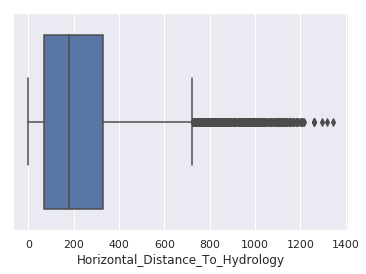

In [8]:
sns.boxplot(x=X_train['Horizontal_Distance_To_Hydrology'])
#sns.boxplot(x=X_train['Vertical_Distance_To_Hydrology'])

In [9]:
quartile_1 = X_train.quantile(0.25)
quartile_3 = X_train.quantile(0.75)
interquartile_range = quartile_3 - quartile_1
print(interquartile_range)

Elevation                              728.00
Aspect                                 196.00
Slope                                   12.00
Horizontal_Distance_To_Hydrology       263.00
Vertical_Distance_To_Hydrology          74.00
Horizontal_Distance_To_Roadways       1506.00
Hillshade_9am                           39.00
Hillshade_Noon                          28.00
Hillshade_3pm                           61.00
Horizontal_Distance_To_Fire_Points    1258.25
Wilderness_Area1                         0.00
Wilderness_Area2                         0.00
Wilderness_Area3                         1.00
Wilderness_Area4                         1.00
Soil_Type1                               0.00
Soil_Type2                               0.00
Soil_Type3                               0.00
Soil_Type4                               0.00
Soil_Type5                               0.00
Soil_Type6                               0.00
Soil_Type7                               0.00
Soil_Type8                        

Whaaaa? No outliers??

In [10]:
outliers = X_train[~((X_train < (quartile_1 - 1.5 * interquartile_range)) |(X_train > (quartile_3 + 1.5 * interquartile_range))).any(axis=1)]
outliers.shape

(0, 55)

In [11]:
import pandas_profiling
X_train.profile_report()

Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   
Wilderness_Area1                     0.330417 -0.131262 -0.152820   
Wilderness_Area2                     0.261729  0.028238 -0.065923   
Wilderness_Area3                     0.354025  0.032578 -0.113033   
Wilderness_Area4                    -0.783651  0.075228  0.286985   
Soil_Type1                          -0.218818 -0.024538  0.099355   
Soil_Type2                          -0.147947 -0.020970 -0.081498   
Soil_Type3                          -0.307523 -0.069120  0.265541   
Soil_Type4                          -0.125342  0.018019  0.087841   
Soil_Type5                          -0.141478  0.000343  0.074720   
Soil_Type6                          -0.187354 -0.006066 -0.047868   
Soil_Type7                                NaN       NaN       NaN   
Soil_Type8                           0.002934  0.001723 -0.012989   
Soil_Type9                          -0.010571 -0.019391 -0.022220   
Soil_Type10                         -0.357816  0.111959  0.255804   
Soil_Type11                         -0.037906 -0.034549 -0.109798   
Soil_Type12                          0.017432 -0.044142 -0.115088   
Soil_Type13                          0.039304  0.024312  0.119863   
Soil_Type14                         -0.140619  0.001181 -0.054085   
Soil_Type15                               NaN       NaN       NaN   
Soil_Type16                         -0.066252  0.027121 -0.064321   
Soil_Type17                         -0.200663  0.029870 -0.124375   
Soil_Type18                         -0.035173 -0.042140 -0.069326   
Soil_Type19                          0.029808  0.007570 -0.047742   
Soil_Type20                          0.008548 -0.023330 -0.068508   
Soil_Type21                          0.032509  0.018815 -0.033935   
Soil_Type22                          0.146236  0.022301 -0.076393   
Soil_Type23                          0.159872  0.041880 -0.184528   
Soil_Type24                          0.097647  0.005480  0.017982   
Soil_Type25                          0.010586 -0.002340  0.011062   
Soil_Type26                          0.020669 -0.009775 -0.030700   
Soil_Type27                          0.040019  0.018986  0.012295   
Soil_Type28                         -0.001077  0.026330  0.036082   
Soil_Type29                          0.165304 -0.063428 -0.083108   
Soil_Type30                          0.048204 -0.086897  0.118725   
Soil_Type31                          0.093191  0.008160 -0.076851   
Soil_Type32                          0.172349  0.003700 -0.147258   
Soil_Type33                          0.123821  0.018719  0.072027   
Soil_Type34                          0.021876  0.012927 -0.030590   
Soil_Type35                          0.120157 -0.004235 -0.048855   
Soil_Type36                          0.040571  0.003160 -0.004570   
Soil_Type37                          0.073825 -0.046309  0.003129   
Soil_Type38                          0.323440  0.043860 -0.148342   
Soil_Type39                          0.296405 -0.031342  0.051900   
Soil_Type40                          0.306755  0.007208 -0.043513   
Cover_Type                           0.016090  0.008015  0.087722   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                     

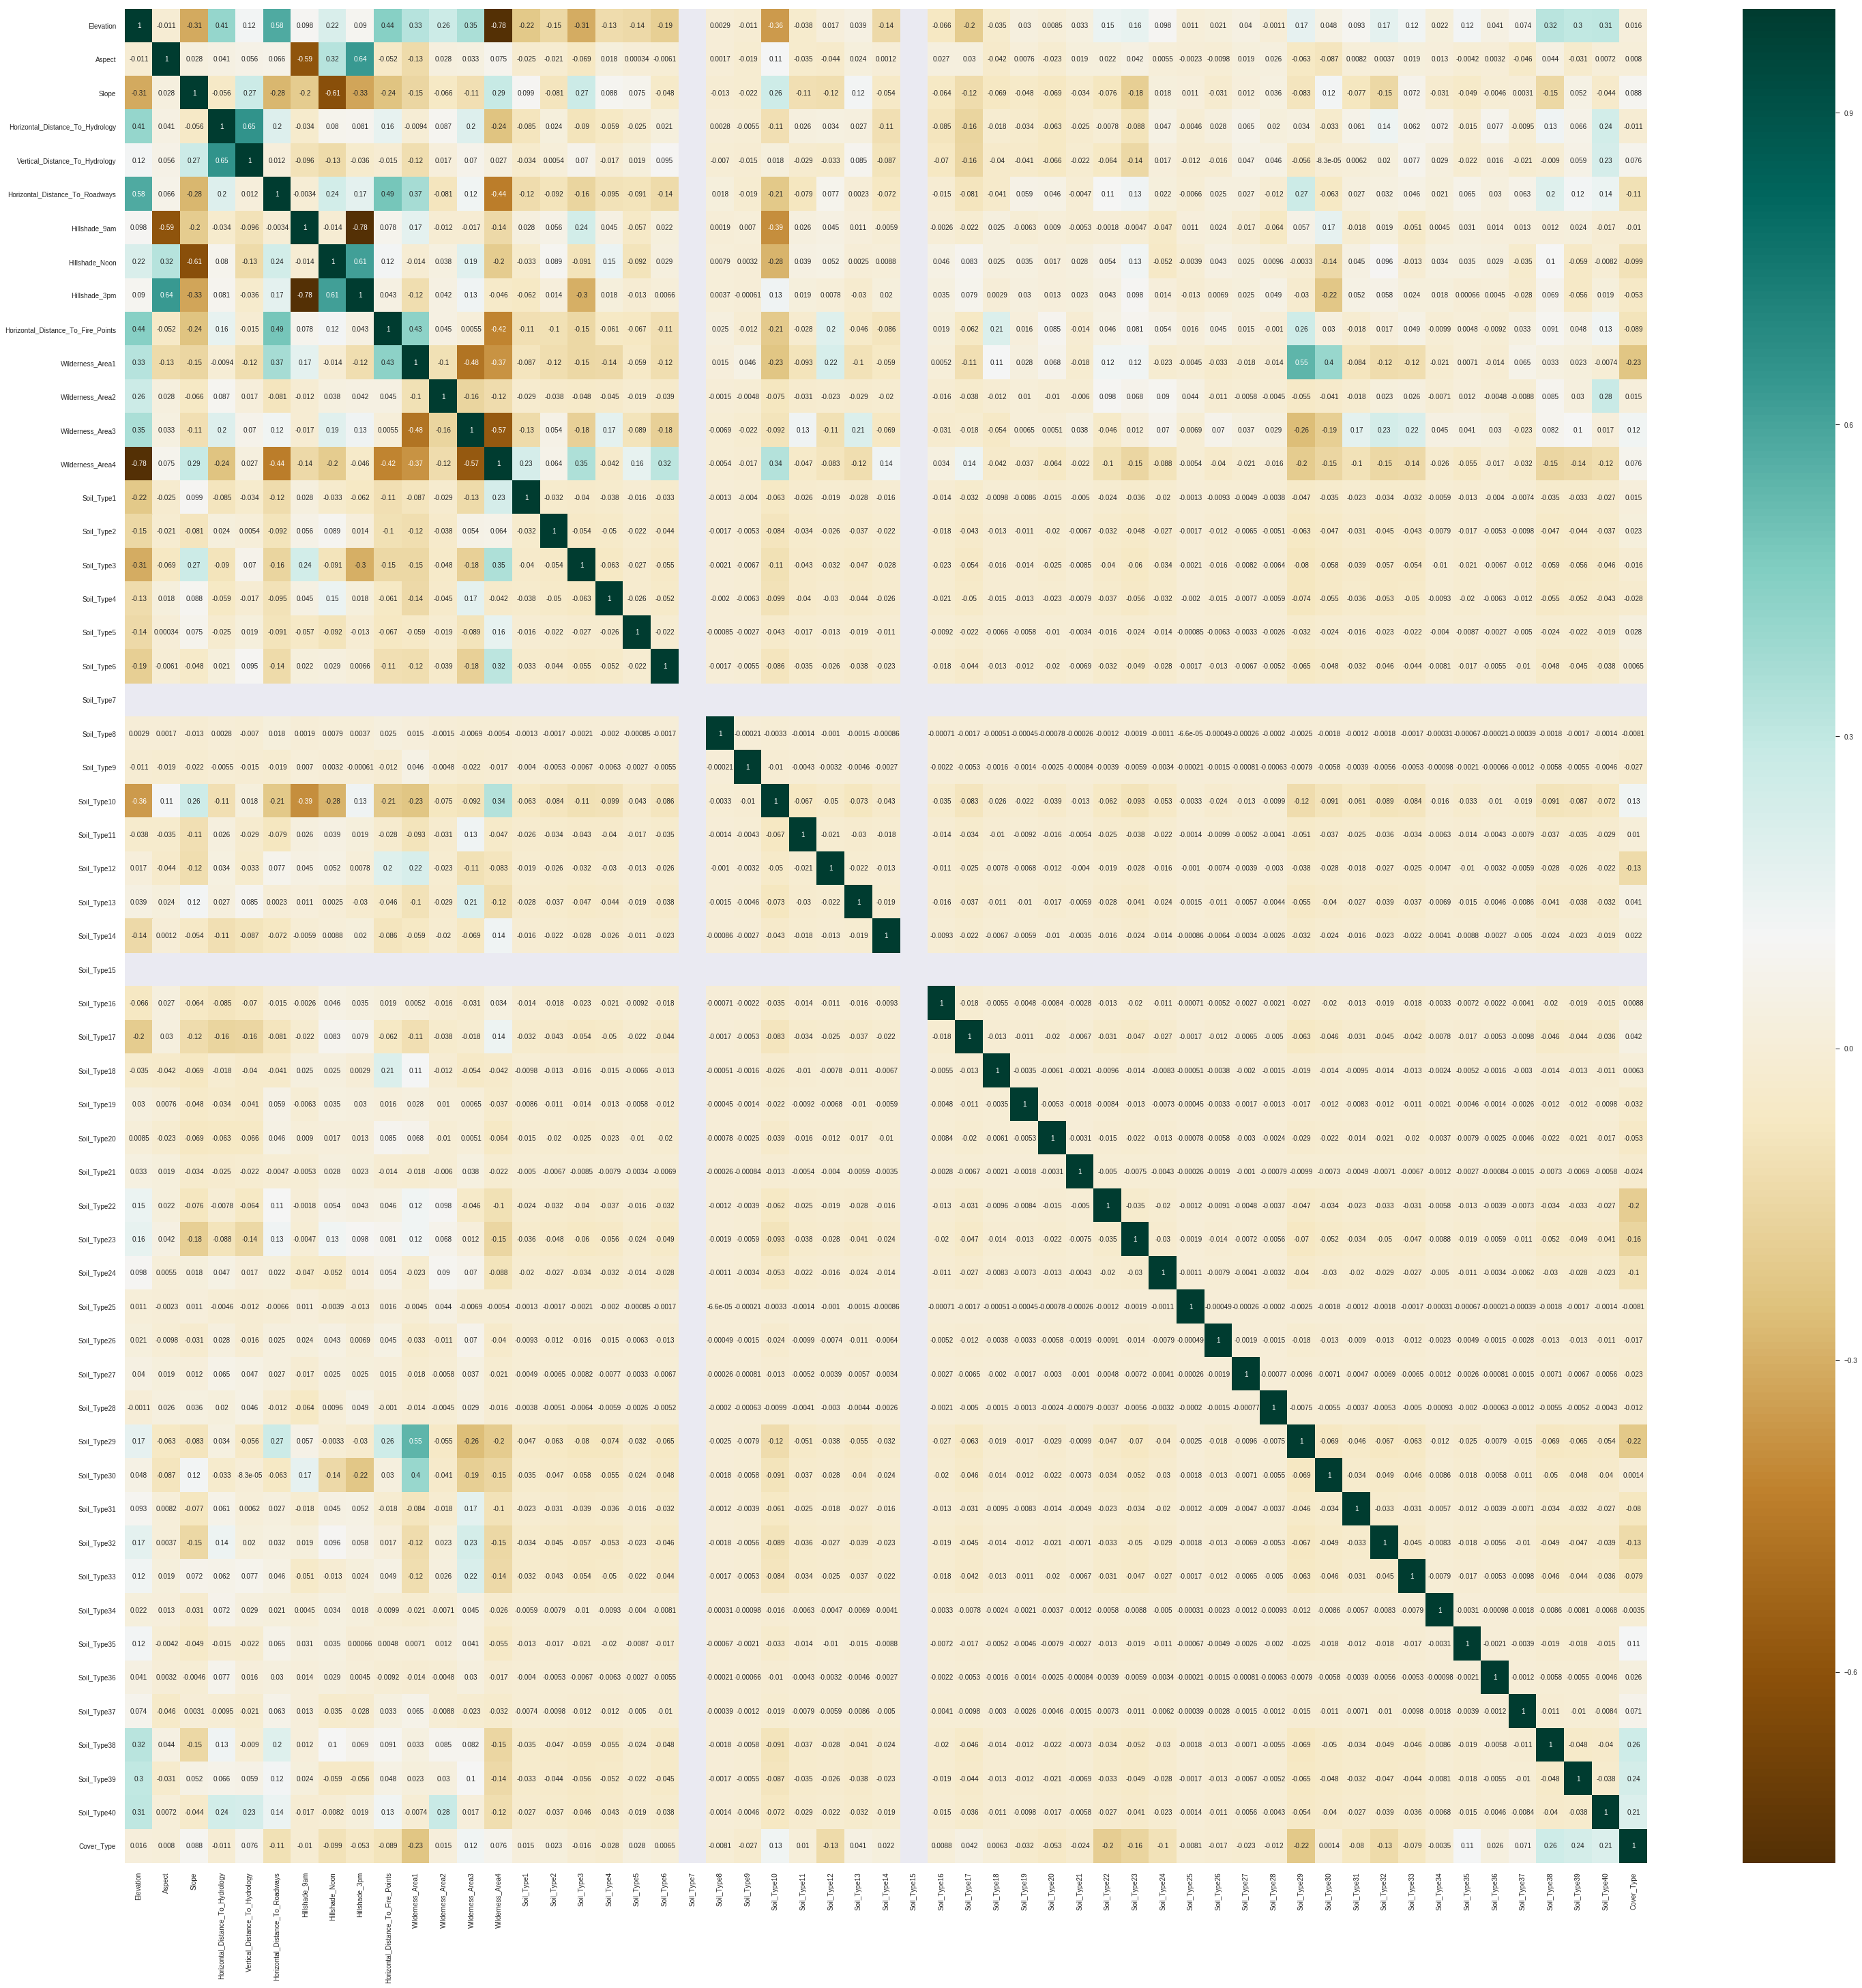

In [12]:
plt.figure(figsize=(50,50))
correlation_df = X_train.corr()
sns.heatmap(correlation_df,cmap="BrBG",annot=True)
correlation_df
